# Worksheet 7 22MS037
Name: Sabarno Saha

Roll: 22MS037

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from comphy import *

In [2]:
def rk4(y,x,k,h,f):
    '''
    Parameters
    ----------
    y : float
        initial value at (n-1) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation using the Runge-Kutta 4 method
    
    Returns
    ---------
    returns the value of y at the next time step using the Runge-Kutta 4 method
    
    '''
 
    k1 = h*f(x,y,k)
    k2 = h*f(x+h/2,y+k1/2,k)
    k3 = h*f(x+h/2,y+k2/2,k)
    k4 = h*f(x+h,y+k3,k)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n
def call(meth,a,b,k,N,y0,f): # call function Discretizes and generates method
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        'euler' for Euler method
        'midpoint' for Midpoint method
        'rk4' for Runge-Kutta 4 method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified.
        
    '''
#     print(k)
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],k,h,f)
    return xs, ys
def bisection(a,b,f,m,yb,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c,m,yb))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c,m,yb)"))
    count = 0
    if abs(f(a,m,yb))<=tol:
        return a
    elif abs(f(b,m,yb))<=tol:
        return b
    if f(a,m,yb)*f(b,m,yb)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a,m,yb)
        fb = f(b,m,yb)
        fc = f(c,m,yb)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c
def simpcube(n,y):
    '''
    Parameters
    ----------
    n : int
        number of points
    a : float
        lower limit of integration
    b : float
        upper limit of integration
    f : function
        function to be integrated
        
    Returns
    ---------
    returns the integral of the function from a to b using the Simpsons 3/8 rule
    '''
    n = 3*(n//3) + 1
    h = np.abs(b-a)/(n-1)
    integral = y[0] + 3*sum(y[1:-2:3])+3*sum(y[2:-1:3])+2*sum(y[3:-3:3]) + y[-1]
    integral = integral*(3*h)/8
    return integral

In [3]:

def pot(x):
    if abs(x)>Lo:
        return 0.0
    elif abs(x)<=Lo:
        v = -Vo * (Lo - x**3) / 2
        return v
def odef(x,y,E):
#     print(x)
#     print(E)
    k2 = E - pot(x)
#     print(k2)
    return np.array([y[1], -k2 * y[0]])

def score(E,f,ybound):
    yi1 = np.asarray([ybound[0], 1.0e-2])
    xs1, ys1 = call(rk4, a, b, E, N, yi1, f)
    a1 = abs(xs1 + Lo)
    yi2 = np.asarray([ybound[1], 1.0e-2])
    xs2, ys2 = call(rk4, b, a, E, N, yi2, f)
    a2 = abs(xs2 + Lo)

    n1 = np.where(a1 == np.min(a1))[0][0]
    n2 = np.where(a2 == np.min(a2))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]

In [4]:
Vo = 40.
Lo = 1.
a = -3.
b = 3.
N = 129
maxiter = 50
tol = 1e-10
ybound = np.asarray([0.0, 0.0])
Es = np.linspace(-Vo, 0, 1000);
scores = [score(i, odef,ybound) for i in Es]

Text(0, 0.5, 'Score')

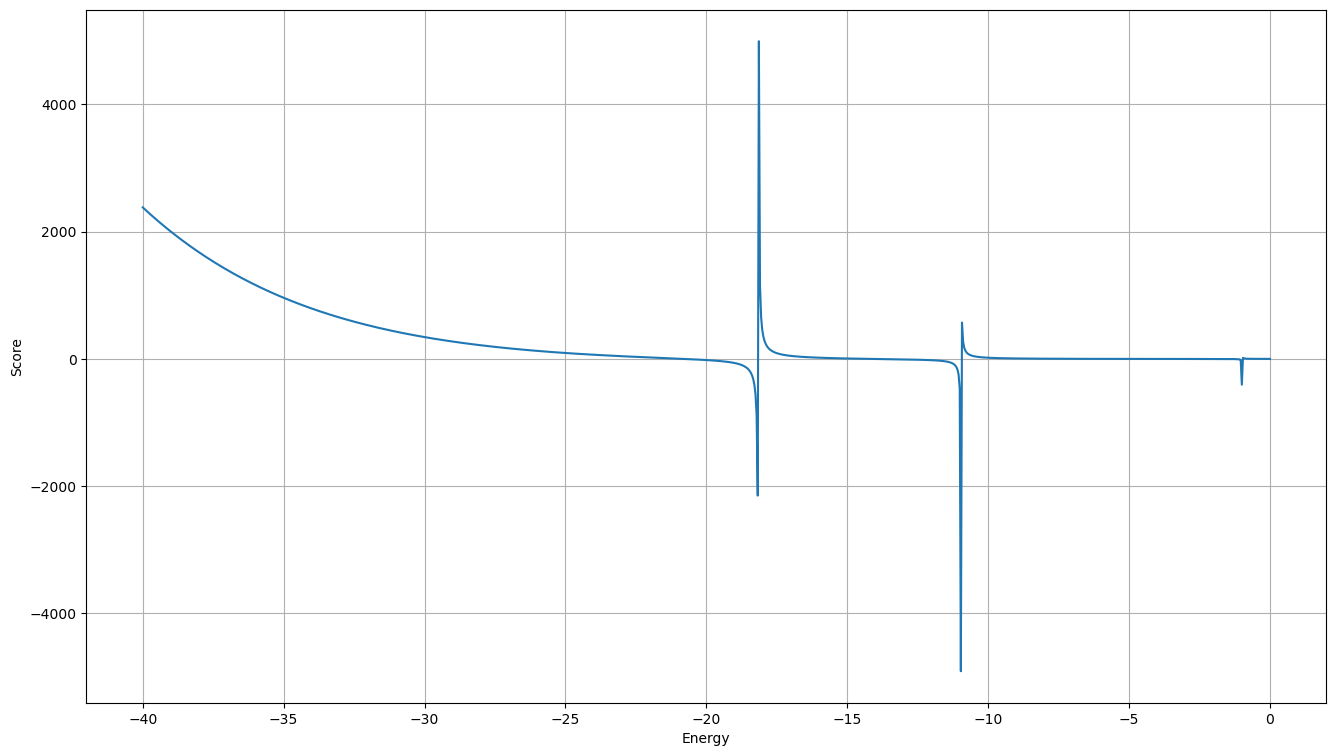

In [5]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores)
plt.grid()
plt.xlabel("Energy")
plt.ylabel("Score")

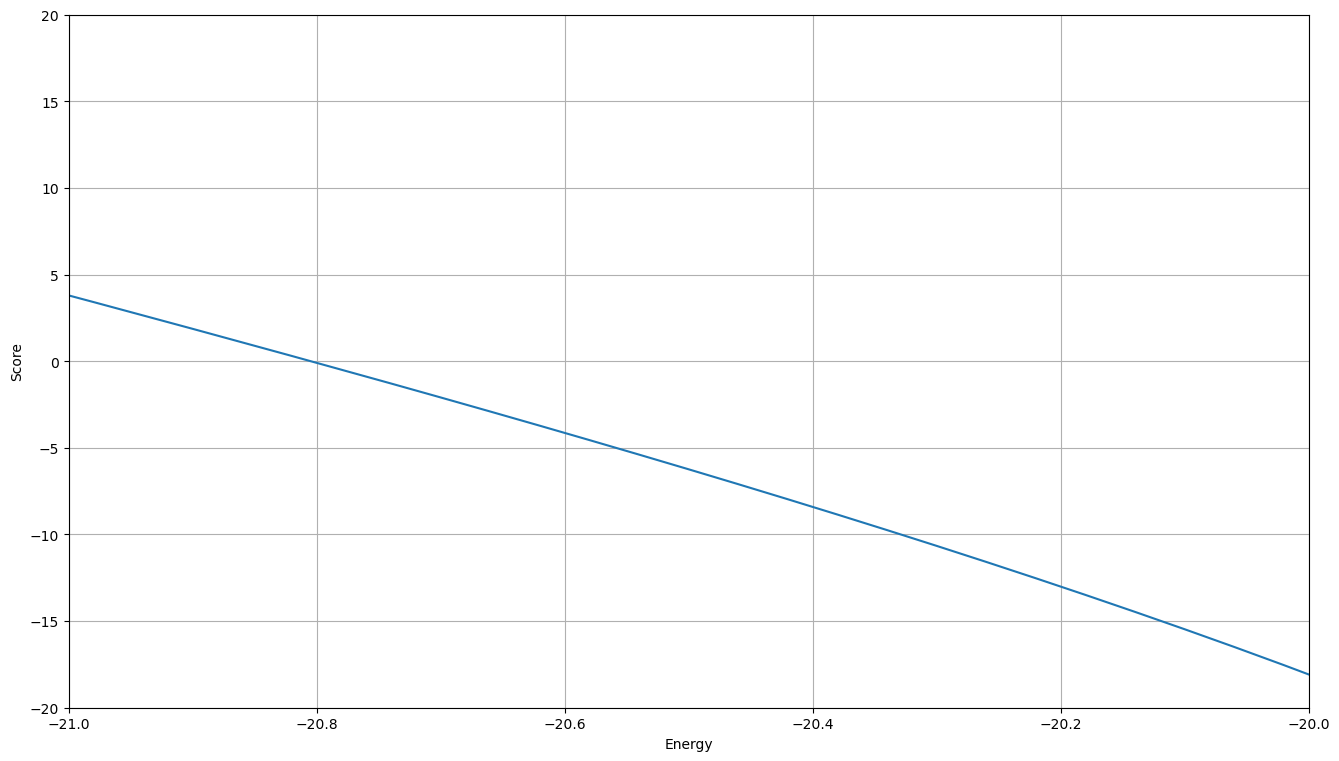

In [6]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores);
plt.xlim([-21,-20])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [7]:
Eini=np.array([-21,-20])

Eeigen = bisection(Eini[0],Eini[1],score,odef,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0 -21.000000 -20.000000 -20.500000  -6.238373
 1 -21.000000 -20.500000 -20.750000  -1.086309
 2 -21.000000 -20.750000 -20.875000   1.382100
 3 -20.875000 -20.750000 -20.812500   0.155096
 4 -20.812500 -20.750000 -20.781250  -0.463687
 5 -20.812500 -20.781250 -20.796875  -0.153831
 6 -20.812500 -20.796875 -20.804688   0.000746
 7 -20.804688 -20.796875 -20.800781  -0.076514
 8 -20.804688 -20.800781 -20.802734  -0.037876
 9 -20.804688 -20.802734 -20.803711  -0.018563
10 -20.804688 -20.803711 -20.804199  -0.008908
11 -20.804688 -20.804199 -20.804443  -0.004081
12 -20.804688 -20.804443 -20.804565  -0.001667
13 -20.804688 -20.804565 -20.804626  -0.000460
14 -20.804688 -20.804626 -20.804657   0.000143
15 -20.804657 -20.804626 -20.804642  -0.000159
16 -20.804657 -20.804642 -20.804649  -0.000008
17 -20.804657 -20.804649 -20.804653   0.000068
18 -20.804653 -20.804649 -20.804651   0.000030
19 -20.804651 -20.804649 -20.804650   0.000011
20 -20.804650 

In [8]:
yi= np.asarray([ybound[0], 1.0e-2])
xe, ye = call(rk4,a,b,Eeigen,N,yi,odef)
y1 = np.array([y[0] for y in ye])
norm = simpcube(len(y1),y1**2)
yf1 = y1/np.sqrt(norm)
norm

np.float64(211.51064902424667)

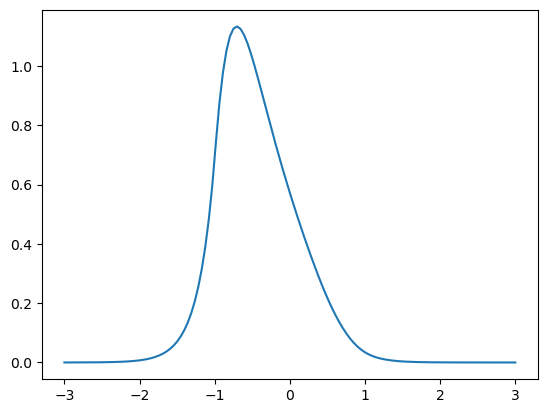

In [9]:
plt.plot(xe, yf1)

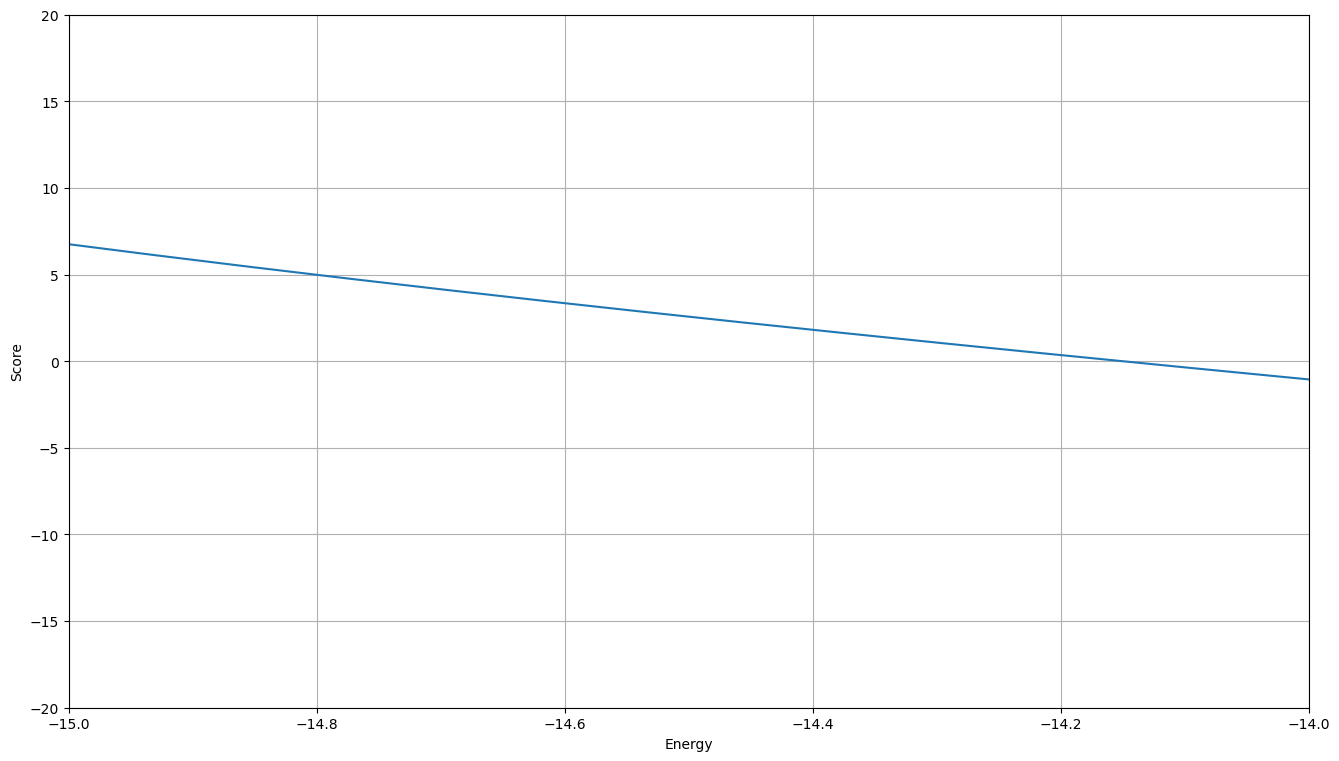

In [10]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores);
plt.xlim([-15,-14])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [11]:
Eini1=np.array([-16,-14])
Eeigen1 = bisection(Eini1[0],Eini1[1],score,odef,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0 -16.000000 -14.000000 -15.000000   6.752474
 1 -15.000000 -14.000000 -14.500000   2.570664
 2 -14.500000 -14.000000 -14.250000   0.713159
 3 -14.250000 -14.000000 -14.125000  -0.177773
 4 -14.250000 -14.125000 -14.187500   0.265111
 5 -14.187500 -14.125000 -14.156250   0.043066
 6 -14.156250 -14.125000 -14.140625  -0.067499
 7 -14.156250 -14.140625 -14.148438  -0.012254
 8 -14.156250 -14.148438 -14.152344   0.015397
 9 -14.152344 -14.148438 -14.150391   0.001569
10 -14.150391 -14.148438 -14.149414  -0.005343
11 -14.150391 -14.149414 -14.149902  -0.001887
12 -14.150391 -14.149902 -14.150146  -0.000159
13 -14.150391 -14.150146 -14.150269   0.000705
14 -14.150269 -14.150146 -14.150208   0.000273
15 -14.150208 -14.150146 -14.150177   0.000057
16 -14.150177 -14.150146 -14.150162  -0.000051
17 -14.150177 -14.150162 -14.150169   0.000003
18 -14.150169 -14.150162 -14.150166  -0.000024
19 -14.150169 -14.150166 -14.150167  -0.000011
20 -14.150169 

In [12]:
xe1, ye1 = call(rk4,a,b,Eeigen1,N,yi,odef)
y1 = np.array([y[0] for y in ye1])
norm1 = simpcube(len(y1),y1**2)
yf2 = y1/np.sqrt(norm1)

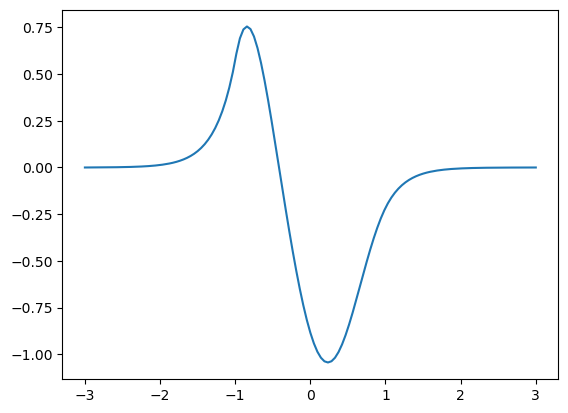

In [13]:
plt.plot(xe1, yf2)

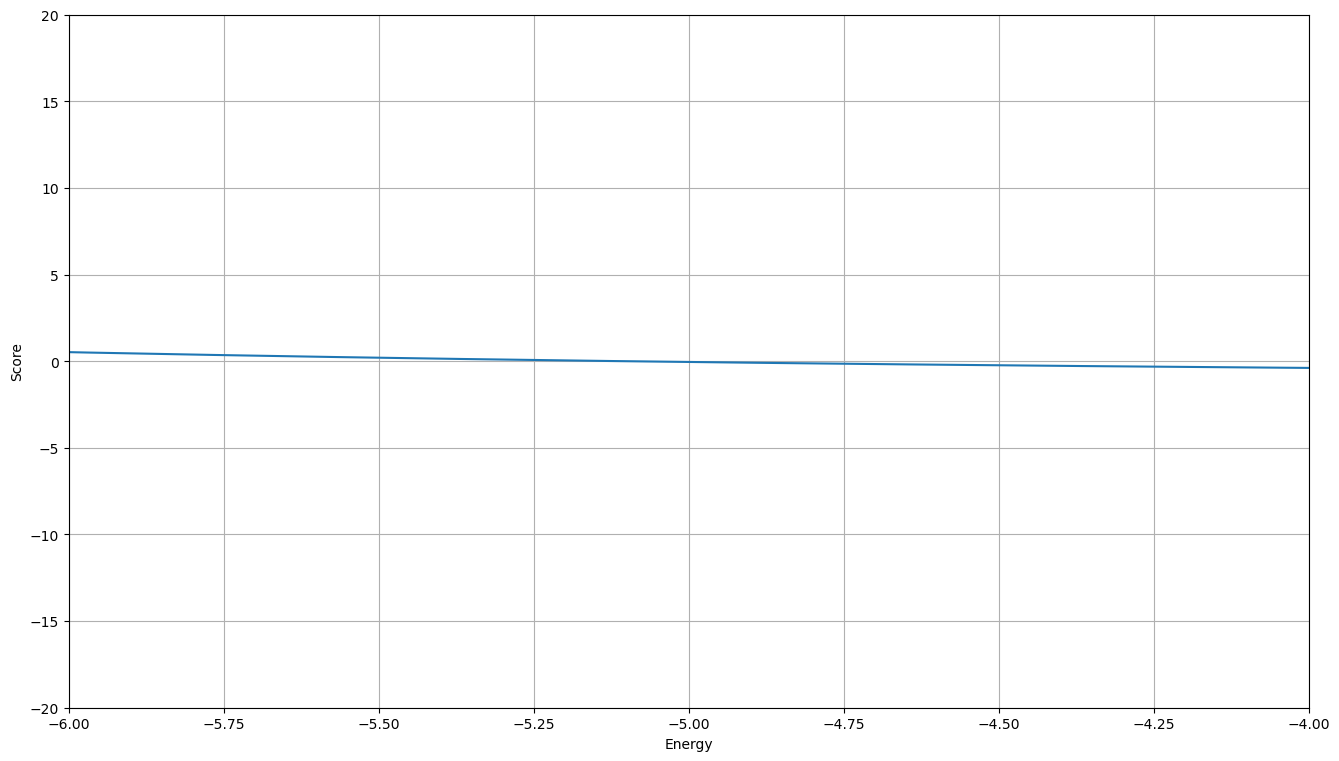

In [14]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores);
plt.xlim([-6,-4])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [15]:
Eini2=np.array([-6,-4])
Eeigen2 = bisection(Eini2[0],Eini2[1],score,odef,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0  -6.000000  -4.000000  -5.000000  -0.044078
 1  -6.000000  -5.000000  -5.500000   0.201909
 2  -5.500000  -5.000000  -5.250000   0.070848
 3  -5.250000  -5.000000  -5.125000   0.011520
 4  -5.125000  -5.000000  -5.062500  -0.016727
 5  -5.125000  -5.062500  -5.093750  -0.002718
 6  -5.125000  -5.093750  -5.109375   0.004372
 7  -5.109375  -5.093750  -5.101562   0.000820
 8  -5.101562  -5.093750  -5.097656  -0.000951
 9  -5.101562  -5.097656  -5.099609  -0.000066
10  -5.101562  -5.099609  -5.100586   0.000377
11  -5.100586  -5.099609  -5.100098   0.000155
12  -5.100098  -5.099609  -5.099854   0.000045
13  -5.099854  -5.099609  -5.099731  -0.000011
14  -5.099854  -5.099731  -5.099792   0.000017
15  -5.099792  -5.099731  -5.099762   0.000003
16  -5.099762  -5.099731  -5.099747  -0.000004
17  -5.099762  -5.099747  -5.099754  -0.000000
18  -5.099762  -5.099754  -5.099758   0.000001
19  -5.099758  -5.099754  -5.099756   0.000000
20  -5.099756 

In [16]:
xe2, ye2 = call(rk4,a,b,Eeigen2,N,yi,odef)
y1 = np.array([y[0] for y in ye2])
norm2 = simpcube(len(y1),y1**2)
yf3 = y1/np.sqrt(norm2)

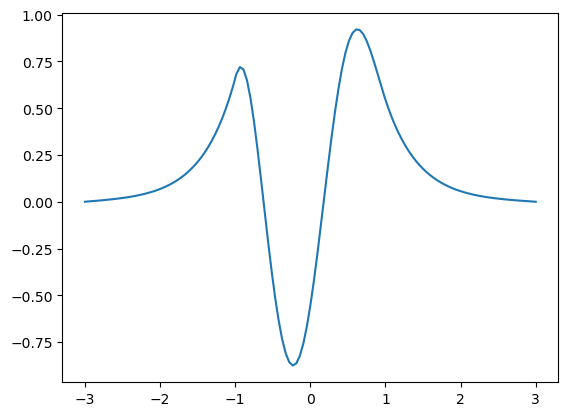

In [17]:
plt.plot(xe2, yf3)

## Results

Text(0.5, 1.0, 'Potential Well')

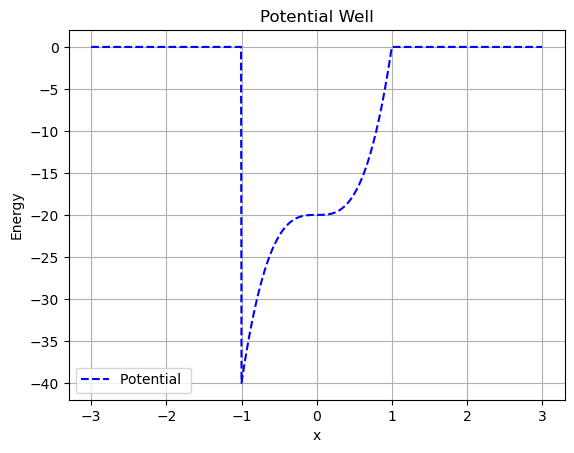

In [18]:
xval = np.linspace(-3.,3., 1000)
yval = np.asarray([pot(i) for i in xval])
plt.plot(xval,yval,'b--', label = r"Potential ")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("Energy")
plt.title("Potential Well")

Text(0.5, 0.98, 'Eigenfunctions and their Energy eigenvalues')

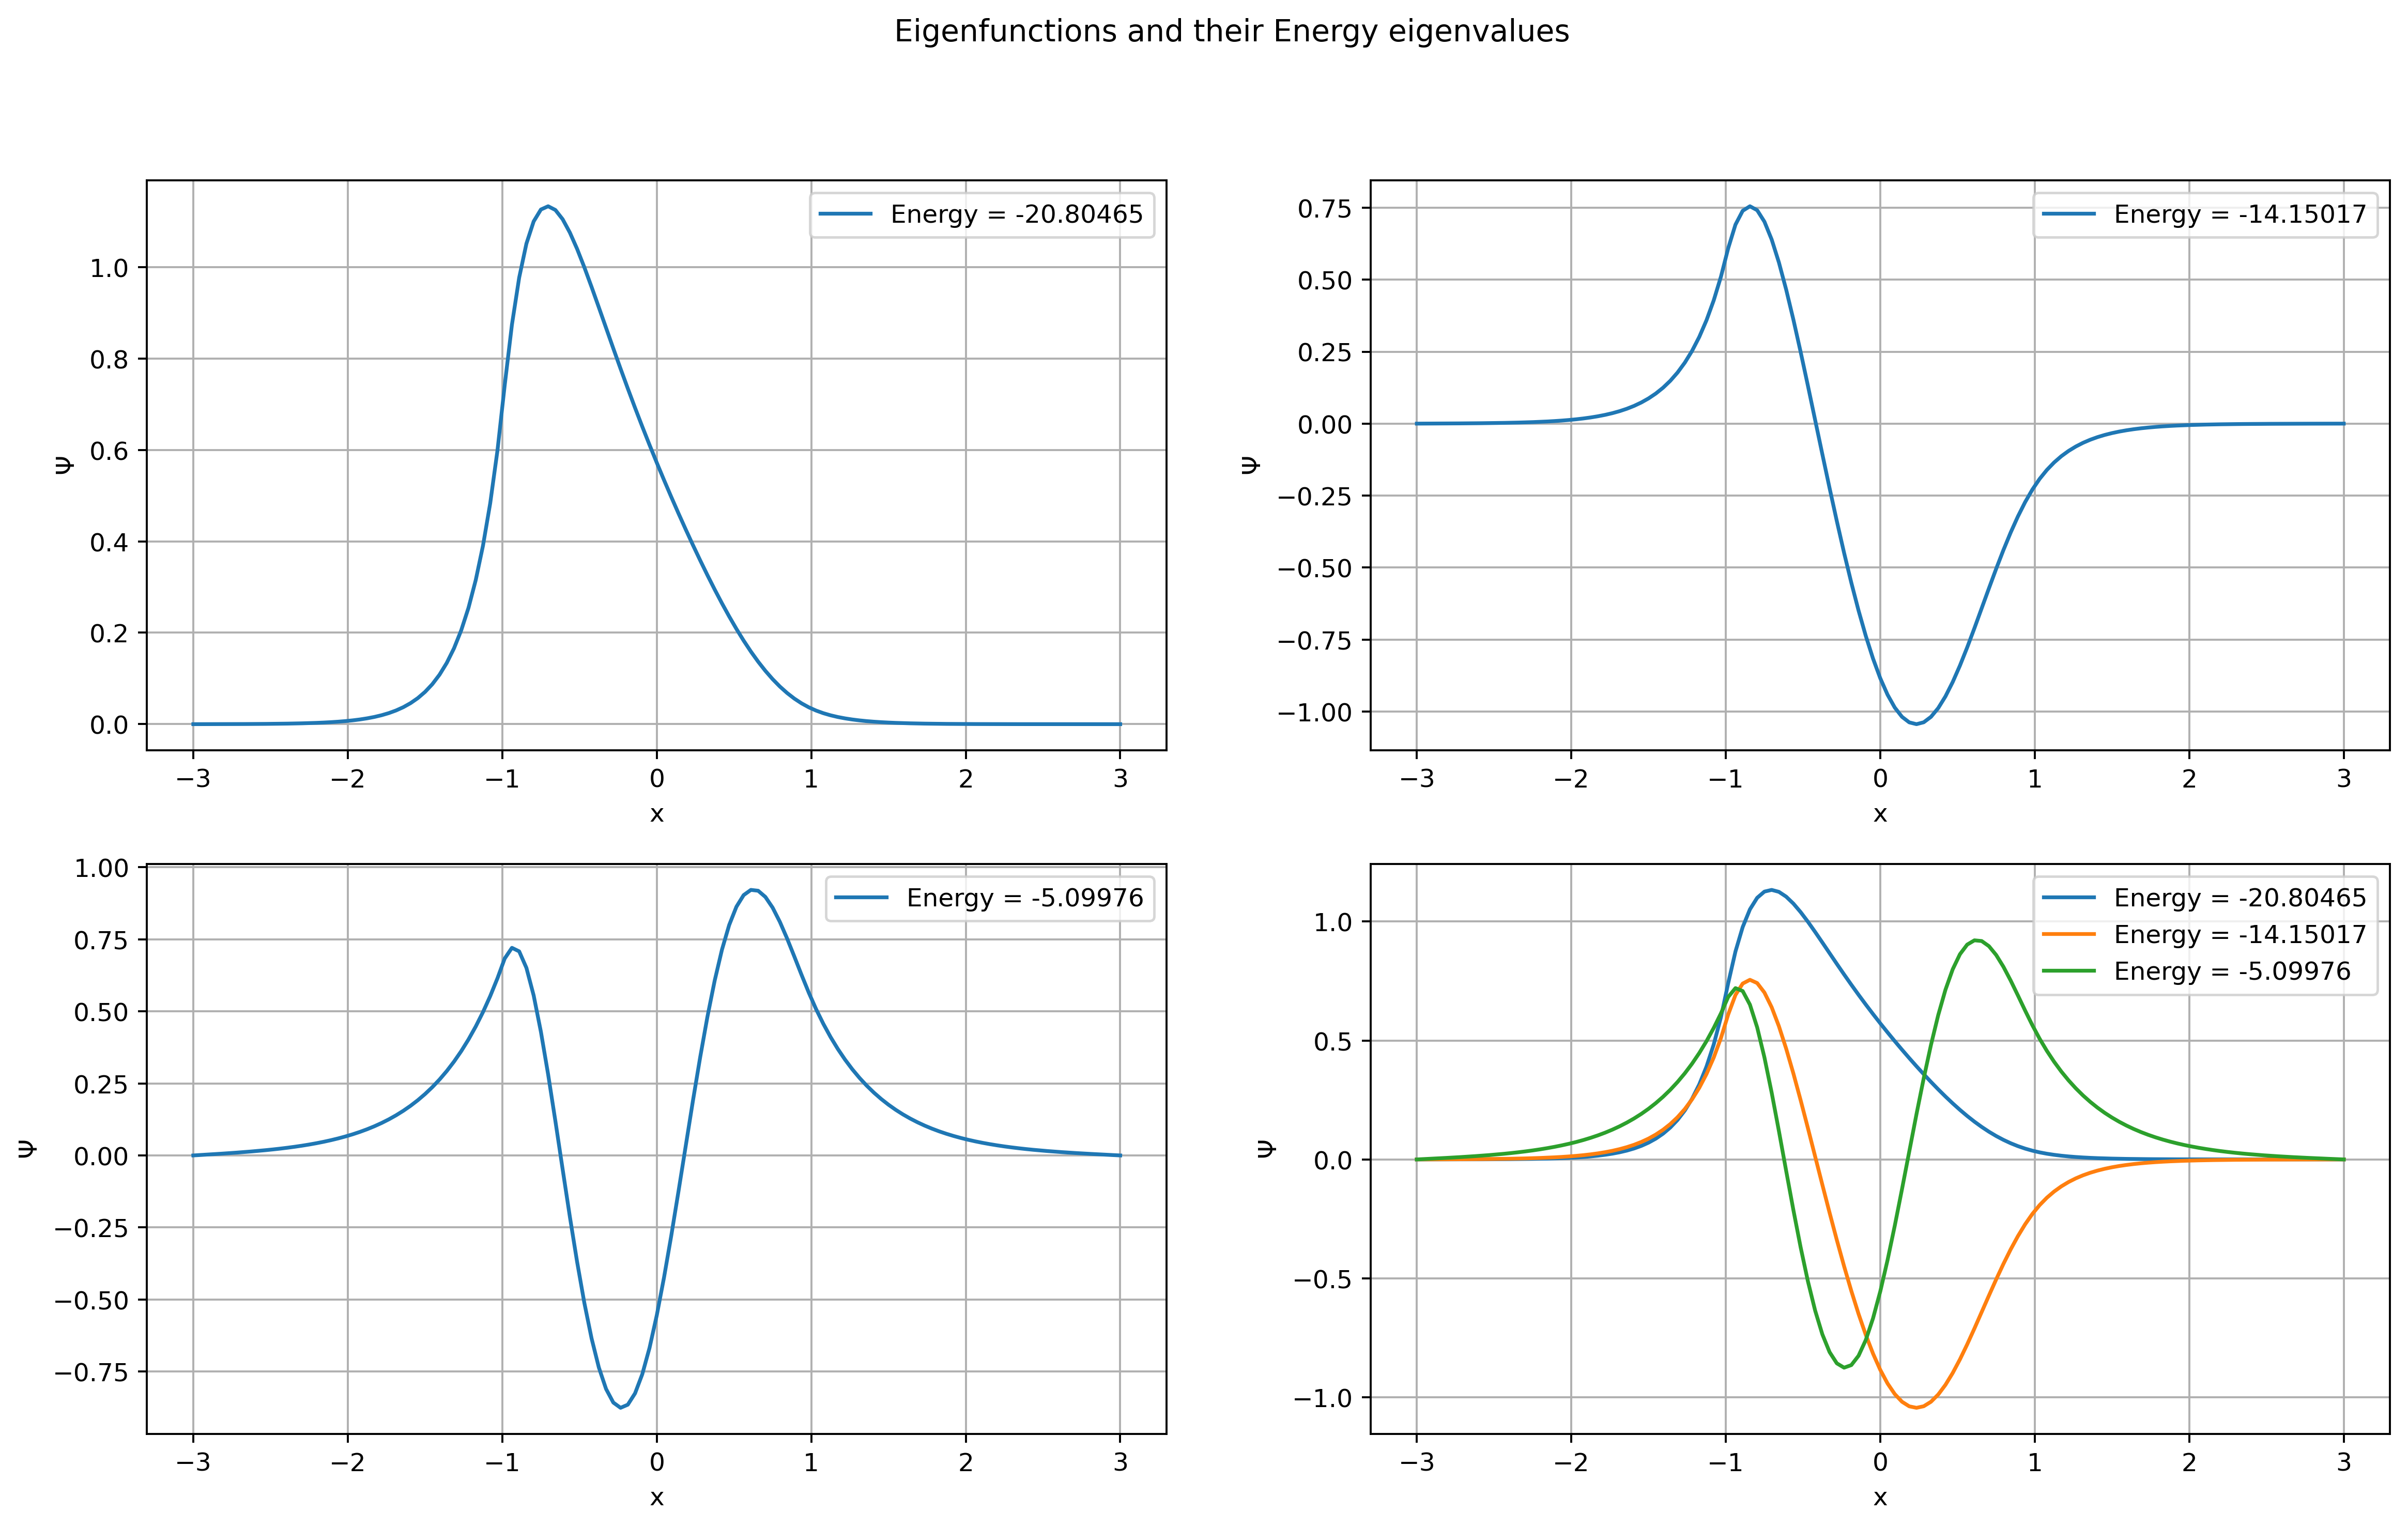

In [19]:
fig,axes = plt.subplots(2,2,figsize = (16,9), dpi =350)
axes[0][0].plot(xe1, yf1, label = f"Energy = {Eeigen:.5f}")
axes[0][1].plot(xe1, yf2, label = f"Energy = {Eeigen1:.5f}")
axes[1][0].plot(xe1, yf3, label = f"Energy = {Eeigen2:.5f}")
axes[1][1].plot(xe1, yf1, label = f"Energy = {Eeigen:.5f}")
axes[1][1].plot(xe1, yf2, label = f"Energy = {Eeigen1:.5f}")
axes[1][1].plot(xe1, yf3, label = f"Energy = {Eeigen2:.5f}")

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\Psi$")
fig.suptitle("Eigenfunctions and their Energy eigenvalues")

# Question 2

In [20]:
def pot1(x):
    return x**2

In [21]:
def odef1(x,y,E):
    k2 = E - pot1(x)
    return np.array([y[1], -k2 * y[0]])

In [22]:
Es1 = np.linspace( 0,7, 1000);
scores1 = [score(E, odef1, ybound) for E in Es1];

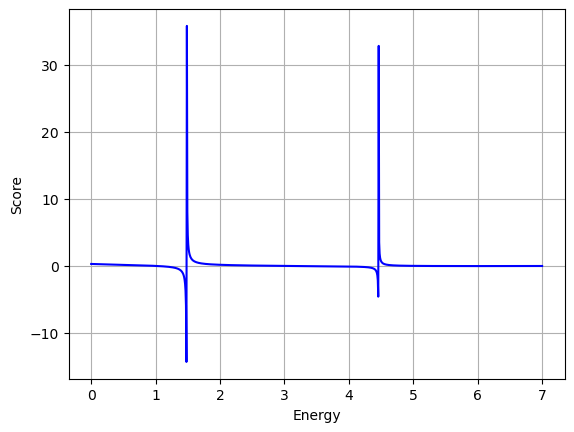

In [23]:
plt.plot(Es1,scores1,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

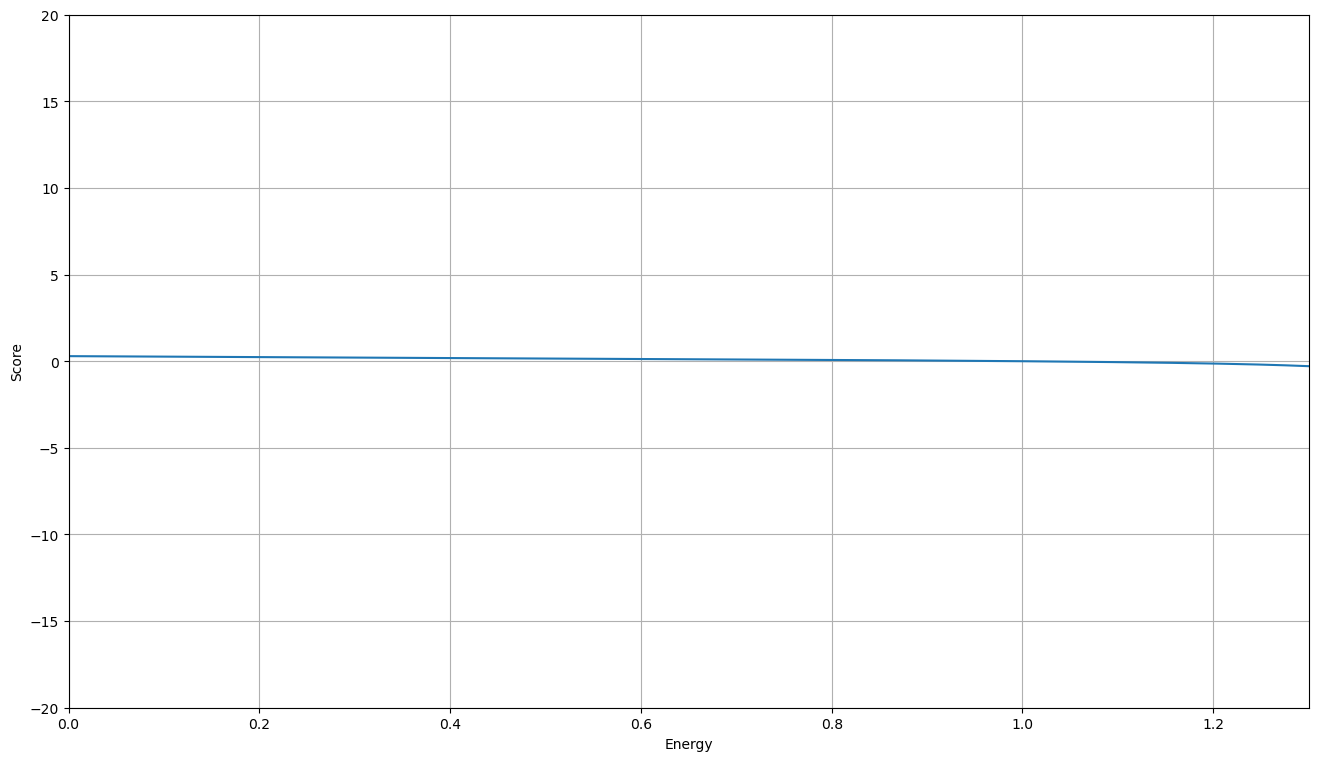

In [24]:
plt.figure(figsize=(16,9))
plt.plot(Es1,scores1);
plt.xlim([0,1.3])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [25]:
Ei1=np.array([0,1.3])
Eeig1 = bisection(Ei1[0],Ei1[1],score,odef1,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0   0.000000   1.300000   0.650000   0.120740
 1   0.650000   1.300000   0.975000   0.011509
 2   0.975000   1.300000   1.137500  -0.079068
 3   0.975000   1.137500   1.056250  -0.027693
 4   0.975000   1.056250   1.015625  -0.006982
 5   0.975000   1.015625   0.995313   0.002504
 6   0.995313   1.015625   1.005469  -0.002175
 7   0.995313   1.005469   1.000391   0.000180
 8   1.000391   1.005469   1.002930  -0.000993
 9   1.000391   1.002930   1.001660  -0.000405
10   1.000391   1.001660   1.001025  -0.000112
11   1.000391   1.001025   1.000708   0.000034
12   1.000708   1.001025   1.000867  -0.000039
13   1.000708   1.000867   1.000787  -0.000002
14   1.000708   1.000787   1.000748   0.000016
15   1.000748   1.000787   1.000768   0.000007
16   1.000768   1.000787   1.000777   0.000002
17   1.000777   1.000787   1.000782  -0.000000
18   1.000777   1.000782   1.000780   0.000001
19   1.000780   1.000782   1.000781   0.000000
20   1.000781 

In [26]:
xei1, yei1 = call(rk4,a,b,Eeig1,N,yi,odef1)
yn1 = np.array([y[0] for y in yei1])
nm1 = simpcube(len(yn1),yn1**2)
ynf1 = yn1/np.sqrt(nm1)

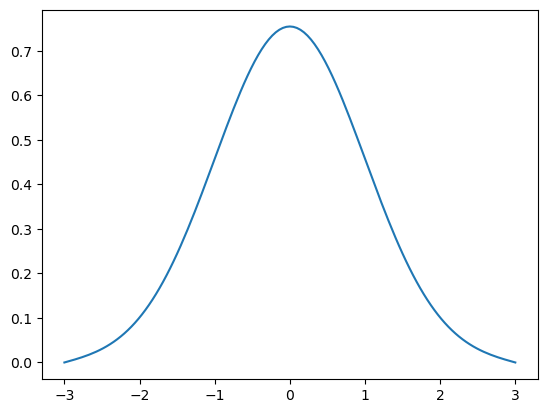

In [27]:
plt.plot(xei1, ynf1)

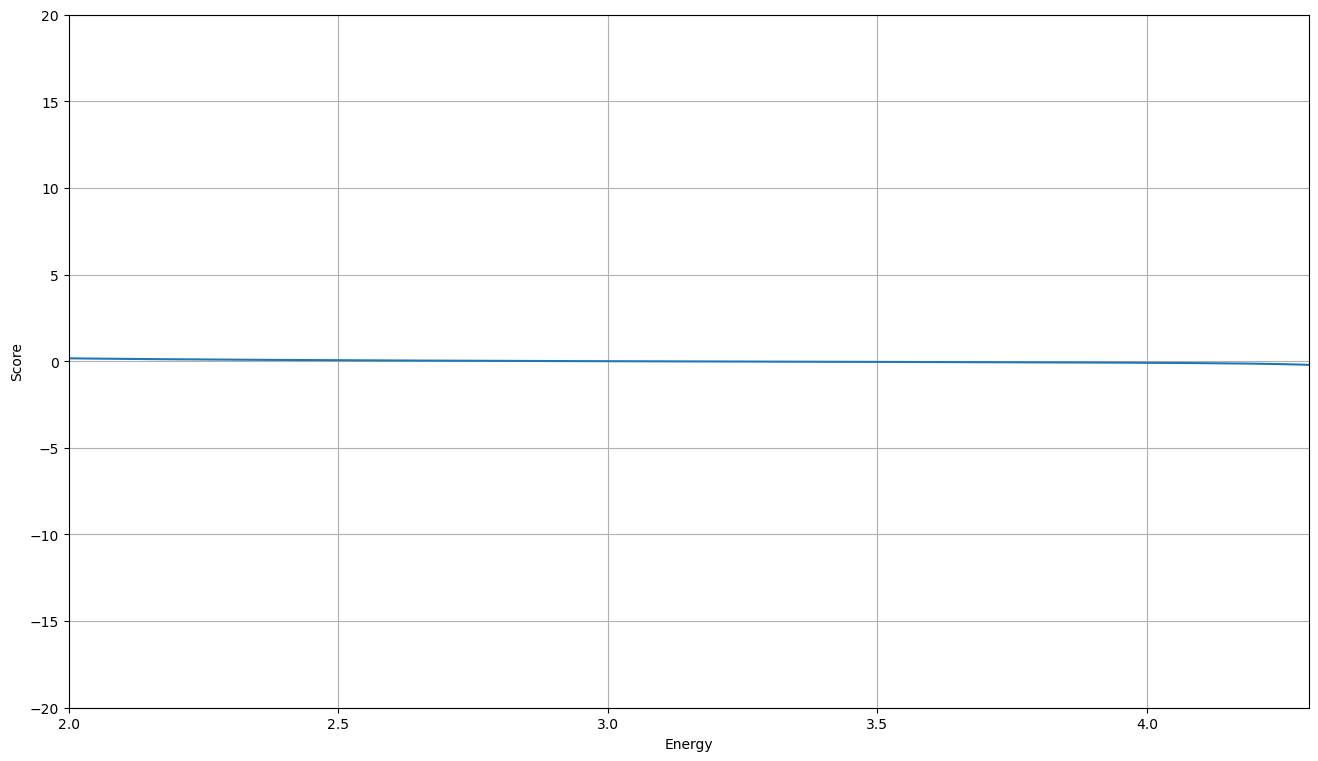

In [28]:
plt.figure(figsize=(16,9))
plt.plot(Es1,scores1);
plt.xlim([2,4.3])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [29]:
Ei2=np.array([2,4.3])
Eeig2 = bisection(Ei2[0],Ei2[1],score,odef1,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0   2.000000   4.300000   3.150000  -0.011913
 1   2.000000   3.150000   2.575000   0.046905
 2   2.575000   3.150000   2.862500   0.014175
 3   2.862500   3.150000   3.006250   0.000533
 4   3.006250   3.150000   3.078125  -0.005815
 5   3.006250   3.078125   3.042187  -0.002675
 6   3.006250   3.042187   3.024219  -0.001080
 7   3.006250   3.024219   3.015234  -0.000276
 8   3.006250   3.015234   3.010742   0.000128
 9   3.010742   3.015234   3.012988  -0.000074
10   3.010742   3.012988   3.011865   0.000027
11   3.011865   3.012988   3.012427  -0.000024
12   3.011865   3.012427   3.012146   0.000002
13   3.012146   3.012427   3.012286  -0.000011
14   3.012146   3.012286   3.012216  -0.000005
15   3.012146   3.012216   3.012181  -0.000002
16   3.012146   3.012181   3.012164   0.000000
17   3.012164   3.012181   3.012172  -0.000001
18   3.012164   3.012172   3.012168  -0.000000
19   3.012164   3.012168   3.012166  -0.000000
20   3.012164 

In [30]:
xei2, yei2 = call(rk4,a,b,Eeig2,N,yi,odef1)
yn1 = np.array([y[0] for y in yei2])
nm1 = simpcube(len(yn1),yn1**2)
ynf2 = yn1/np.sqrt(nm1)

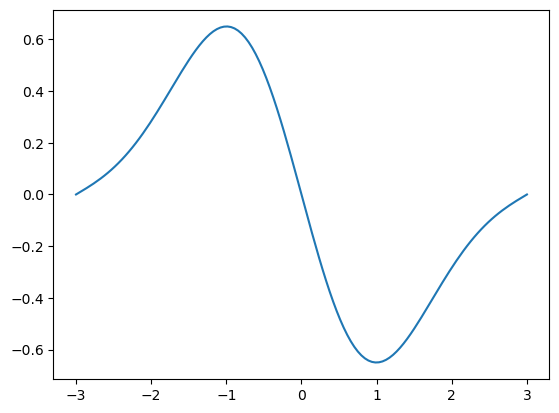

In [31]:
plt.plot(xei2,ynf2)

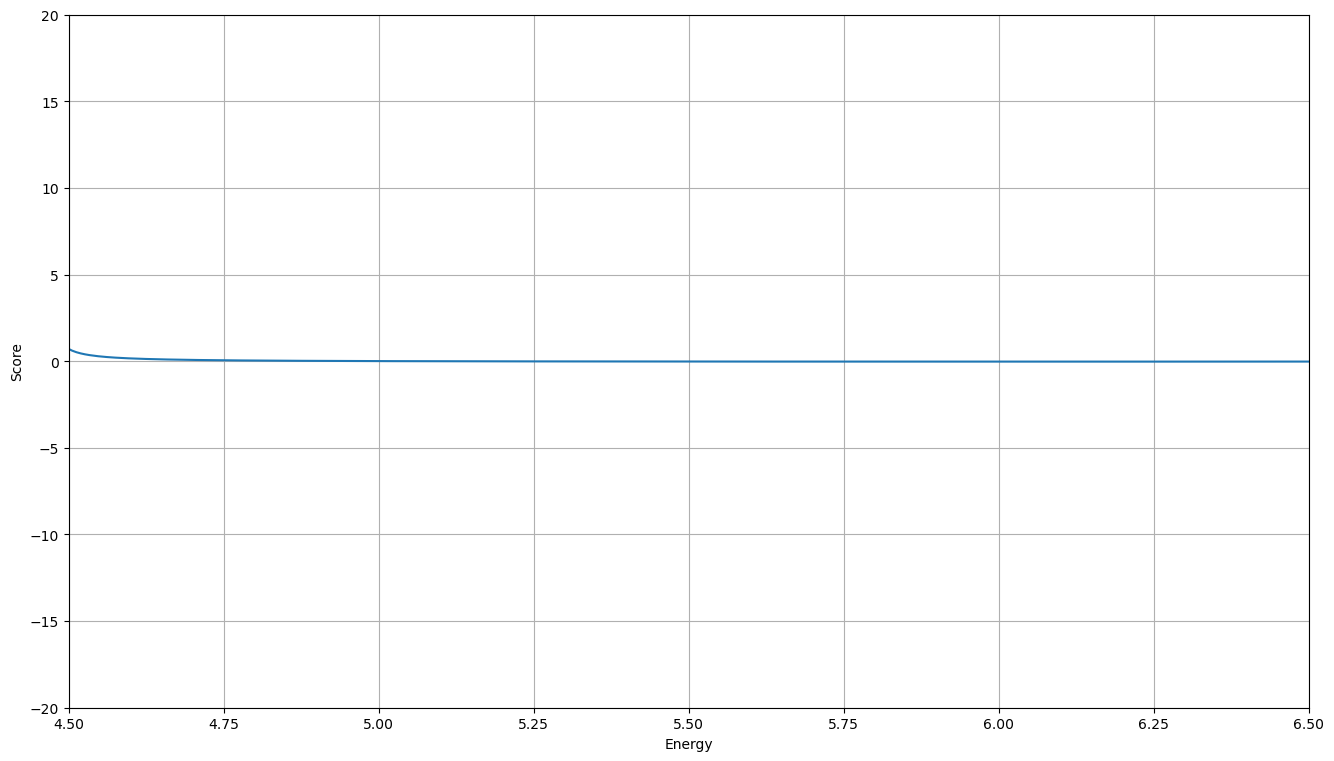

In [32]:
plt.figure(figsize=(16,9))
plt.plot(Es1,scores1);
plt.xlim([4.5,6.5])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [33]:
Ei3=np.array([4.5,6.5])
Eeig3 = bisection(Ei3[0],Ei3[1],score,odef1,ybound, tol,maxiter)

n          a          b          c  f(c,m,yb)
 0   4.500000   6.500000   5.500000  -0.017907
 1   4.500000   5.500000   5.000000   0.007201
 2   5.000000   5.500000   5.250000  -0.009846
 3   5.000000   5.250000   5.125000  -0.003017
 4   5.000000   5.125000   5.062500   0.001546
 5   5.062500   5.125000   5.093750  -0.000853
 6   5.062500   5.093750   5.078125   0.000315
 7   5.078125   5.093750   5.085938  -0.000277
 8   5.078125   5.085938   5.082031   0.000017
 9   5.082031   5.085938   5.083984  -0.000130
10   5.082031   5.083984   5.083008  -0.000057
11   5.082031   5.083008   5.082520  -0.000020
12   5.082031   5.082520   5.082275  -0.000001
13   5.082031   5.082275   5.082153   0.000008
14   5.082153   5.082275   5.082214   0.000003
15   5.082214   5.082275   5.082245   0.000001
16   5.082245   5.082275   5.082260  -0.000000
17   5.082245   5.082260   5.082253   0.000000
18   5.082253   5.082260   5.082256   0.000000
19   5.082256   5.082260   5.082258   0.000000
20   5.082258 

In [34]:
xei3, yei3 = call(rk4,a,b,Eeig3,N,yi,odef1)
yn1 = np.array([y[0] for y in yei3])
nm1 = simpcube(len(yn1),yn1**2)
ynf3 = yn1/np.sqrt(nm1)

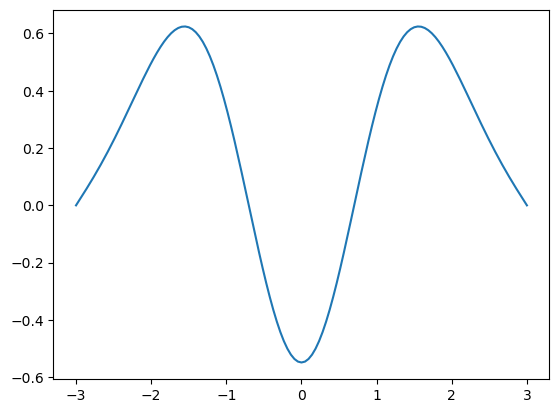

In [35]:
plt.plot(xei3,ynf3)

## Results

Text(0.5, 1.0, 'Potential Well')

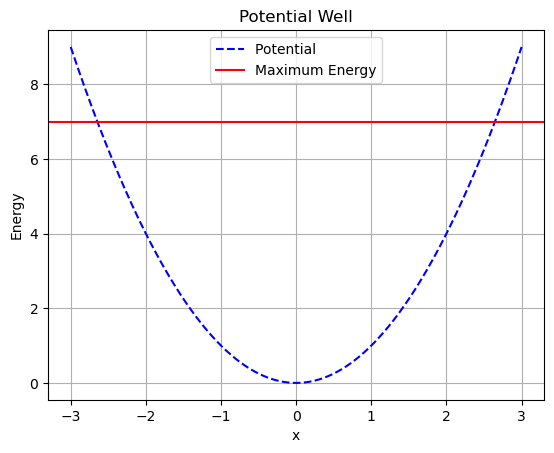

In [36]:
xval = np.linspace(-3.,3., 1000)
yval = np.asarray([pot1(i) for i in xval])
plt.plot(xval,yval,'b--', label = r"Potential ")
plt.axhline(max(Es1), label = "Maximum Energy", c='r')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("Energy")
plt.title("Potential Well")

Text(0.5, 0.98, 'Eigenfunctions and their Energy eigenvalues')

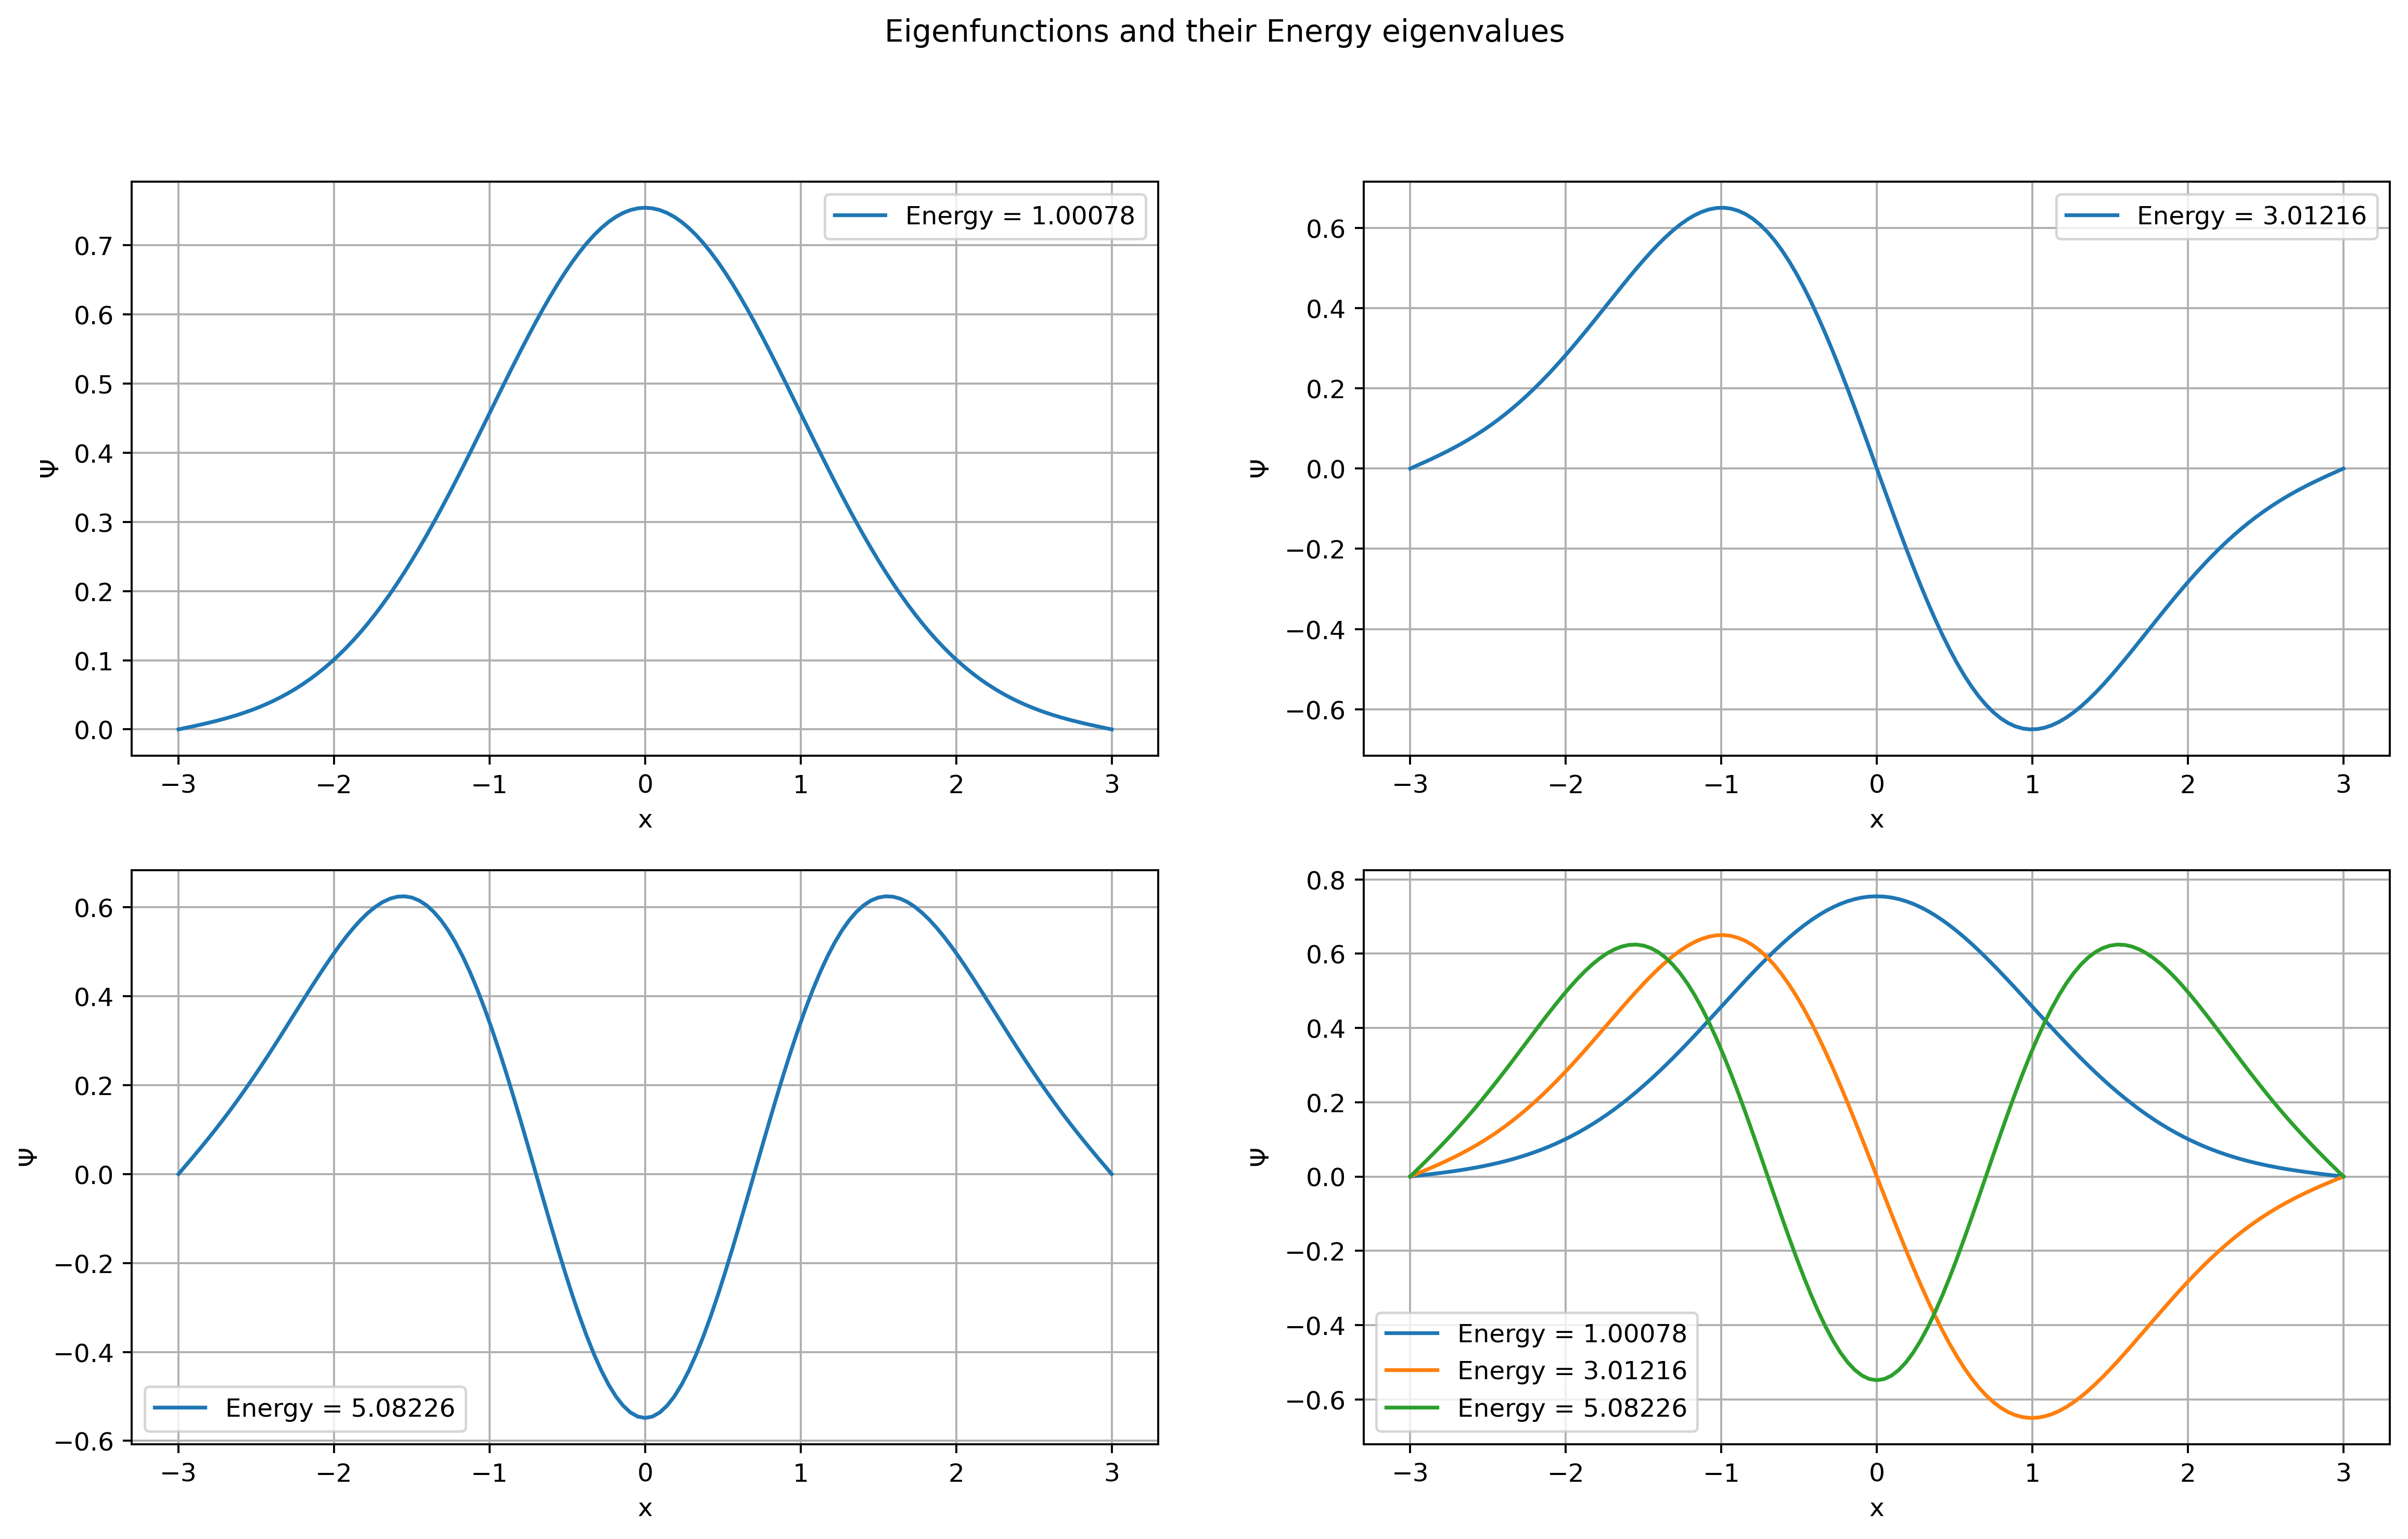

In [37]:
fig,axes = plt.subplots(2,2,figsize = (16,9), dpi =350)
axes[0][0].plot(xei1, ynf1, label = f"Energy = {Eeig1:.5f}")
axes[0][1].plot(xei1, ynf2, label = f"Energy = {Eeig2:.5f}")
axes[1][0].plot(xei1, ynf3, label = f"Energy = {Eeig3:.5f}")
axes[1][1].plot(xei1, ynf1, label = f"Energy = {Eeig1:.5f}")
axes[1][1].plot(xei1, ynf2, label = f"Energy = {Eeig2:.5f}")
axes[1][1].plot(xei1, ynf3, label = f"Energy = {Eeig3:.5f}")

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\Psi$")
fig.suptitle("Eigenfunctions and their Energy eigenvalues")